### Continuous optimization with Genetic Algorithm and Particle Swarm Optimization

In [3]:
from sko.PSO import PSO
from sko.GA import GA
from sko.operators import ranking, selection, crossover, mutation
import numpy as np
import matplotlib.pyplot as plt


In [24]:
def max_function(x):
    x1, x2 = x
    return -((1 / (1 + np.abs(x1) + np.abs(x2))) * (np.cos(x1) + np.sin(x2))**2)

In [104]:
lb = [-5, -5]
ub = [5, 5]

#### Particle Swarm Optimization

In [164]:
pso = PSO(func=max_function, n_dim=2, pop=400, max_iter=30, lb=lb, ub=ub, w=0.2, c1=0.9, c2=0.9)
pso.run()

best_coordinates = pso.gbest_x
best_y = -pso.gbest_y

print(f'Max problem for (x, y)=((1 / (1 + np.abs(x) + np.abs(y))) * (np.cos(x) + np.sin(y))**2) \nBest coordinates: {best_coordinates}\nBest value: {best_y}')

Max problem for (x, y)=((1 / (1 + np.abs(x) + np.abs(y))) * (np.cos(x) + np.sin(y))**2) 
Best coordinates: [1.97513227e-12 1.10421036e+00]
Best value: [1.70318649]


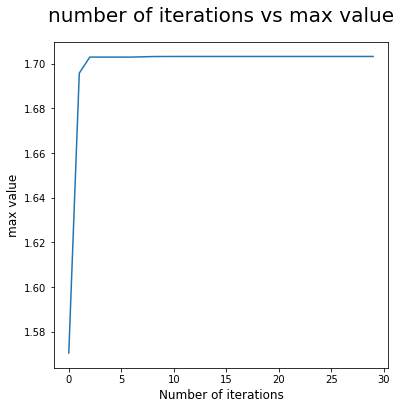

In [144]:
plt.figure(figsize=(6,6))
plt.plot(np.abs(pso.gbest_y_hist))
plt.xlabel("Number of iterations", fontsize=12)
plt.ylabel("max value", fontsize=12)

plt.title("number of iterations vs max value", fontsize=20, pad=20)
plt.show()

#### Genetic Algorithm

In [142]:
ga = GA(func=max_function, n_dim=2, size_pop=40, max_iter=160, prob_mut=0.01,
        lb=lb, ub=ub, precision=[1e-10, 1e-10])

ga.register(operator_name='selection', operator=selection.selection_tournament)
ga.register(operator_name='ranking', operator=ranking.ranking). \
    register(operator_name='crossover', operator=crossover.crossover_2point). \
    register(operator_name='mutation', operator=mutation.mutation)
ga.run()

best_coordinates = ga.best_x
best_y = -ga.best_y

print(f'Max problem for (x, y)=((1 / (1 + np.abs(x) + np.abs(y))) * (np.cos(x) + np.sin(y))**2) \nBest coordinates: {best_coordinates}\nBest value: {best_y}')

Max problem for (x, y)=((1 / (1 + np.abs(x) + np.abs(y))) * (np.cos(x) + np.sin(y))**2) 
Best coordinates: [3.63797881e-11 1.10421212e+00]
Best value: [1.70318649]


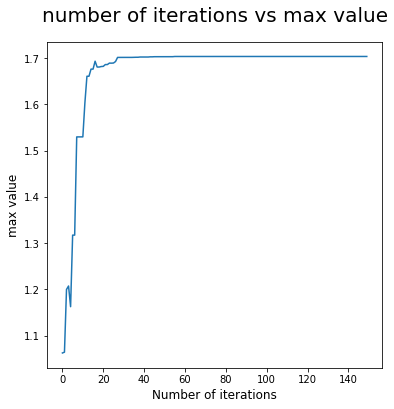

In [108]:
plt.figure(figsize=(6,6))
plt.plot(np.abs(ga.generation_best_Y))
plt.xlabel("Number of iterations", fontsize=12)
plt.ylabel("max value", fontsize=12)

plt.title("number of iterations vs max value", fontsize=20, pad=20)
plt.show()

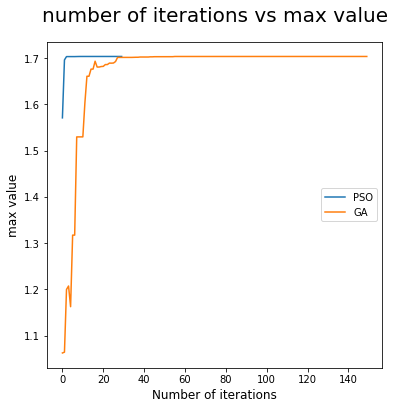

In [121]:

plt.figure(figsize=(6,6))
plt.plot(np.abs(pso.gbest_y_hist), label='PSO')
plt.plot(np.abs(ga.generation_best_Y),label='GA')
plt.legend(loc=5)
plt.xlabel("Number of iterations", fontsize=12)
plt.ylabel("max value", fontsize=12)
plt.title("number of iterations vs max value", fontsize=20, pad=20)
plt.show()